In [56]:
import pandas as pd

df_dev = pd.read_csv('data/development_processed.csv').set_index('Id')
df_eval = pd.read_csv('data/evaluation_processed.csv').set_index('Id')

In [57]:
df_dev.drop(columns=['duration', 'num_characters', 'num_words', 'num_pauses'], inplace=True)
df_eval.drop(columns=['duration', 'num_characters', 'num_words', 'num_pauses'], inplace=True)

In [58]:
from sklearn.model_selection import train_test_split
X = df_dev.drop(columns=['age'])
y = df_dev['age']


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error  
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

for reg in [LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(), SVR(), KNeighborsRegressor(), MLPRegressor()]:
    score = cross_val_score(make_pipeline(StandardScaler(), reg), X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(reg.__class__().__name__(), score.mean())


<class 'sklearn.linear_model._base.LinearRegression'> RMSE: 10.044963812323372
<class 'sklearn.linear_model._coordinate_descent.Lasso'> RMSE: 10.472054204724863
<class 'sklearn.linear_model._ridge.Ridge'> RMSE: 10.044277882364714
<class 'sklearn.ensemble._forest.RandomForestRegressor'> RMSE: 9.877428545746117
<class 'sklearn.svm._classes.SVR'> RMSE: 10.694011218997431
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> RMSE: 10.6092234308545
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> RMSE: 9.524255552968127


c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_test = scaler.transform(df_eval)
reg = Ridge()
reg.fit(X_s, y)
y_pred = reg.predict(X_test)

out_df = pd.DataFrame({'Predicted': y_pred})
out_df.index.name = "Id"

out_df.to_csv('out/last.csv')

In [62]:
from sklearn.feature_selection import RFECV

lasso = Ridge(200)
rfecv = RFECV(estimator=lasso, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(X.columns[rfecv.support_]))

Optimal number of features: 26
Selected features: ['gender', 'mean_pitch', 'jitter', 'shimmer', 'energy', 'zcr_mean', 'spectral_centroid_mean', 'hnr', 'silence_duration', 'MFCC-3-95', 'MFCC-5-95', 'MFCC-9-95', 'MFCC-10-95', 'MFCC-11-95', 'MFCC-2-5', 'MFCC-3-5', 'MFCC-6-5', 'MFCC-7-5', 'MFCC-10-5', 'MFCC-2-50', 'MFCC-4-50', 'MFCC-6-50', 'MFCC-7-50', 'mean_silence', 'silence_ratio', 'wps']


In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np

reg = RandomForestRegressor()
reg.fit(X_train[:, rfecv.support_], y_train)

y_pred_lasso_rfe = reg.predict(X_test[:, rfecv.support_])

rmse_lasso_rfe = np.sqrt(mean_squared_error(y_test, y_pred_lasso_rfe))
print(f'Lasso con RFE RMSE: {rmse_lasso_rfe}')

ValueError: Found input variables with inconsistent numbers of samples: [587, 691]

In [34]:
X.columns[~rfecv.support_]

Index(['max_pitch', 'min_pitch', 'tempo', 'MFCC-1-95', 'MFCC-2-95',
       'MFCC-4-95', 'MFCC-6-95', 'MFCC-7-95', 'MFCC-8-95', 'MFCC-12-95',
       'MFCC-13-95', 'MFCC-1-5', 'MFCC-4-5', 'MFCC-5-5', 'MFCC-8-5',
       'MFCC-9-5', 'MFCC-11-5', 'MFCC-12-5', 'MFCC-13-5', 'MFCC-1-50',
       'MFCC-3-50', 'MFCC-5-50', 'MFCC-8-50', 'MFCC-9-50', 'MFCC-10-50',
       'MFCC-11-50', 'MFCC-12-50', 'MFCC-13-50'],
      dtype='object')

<Axes: >

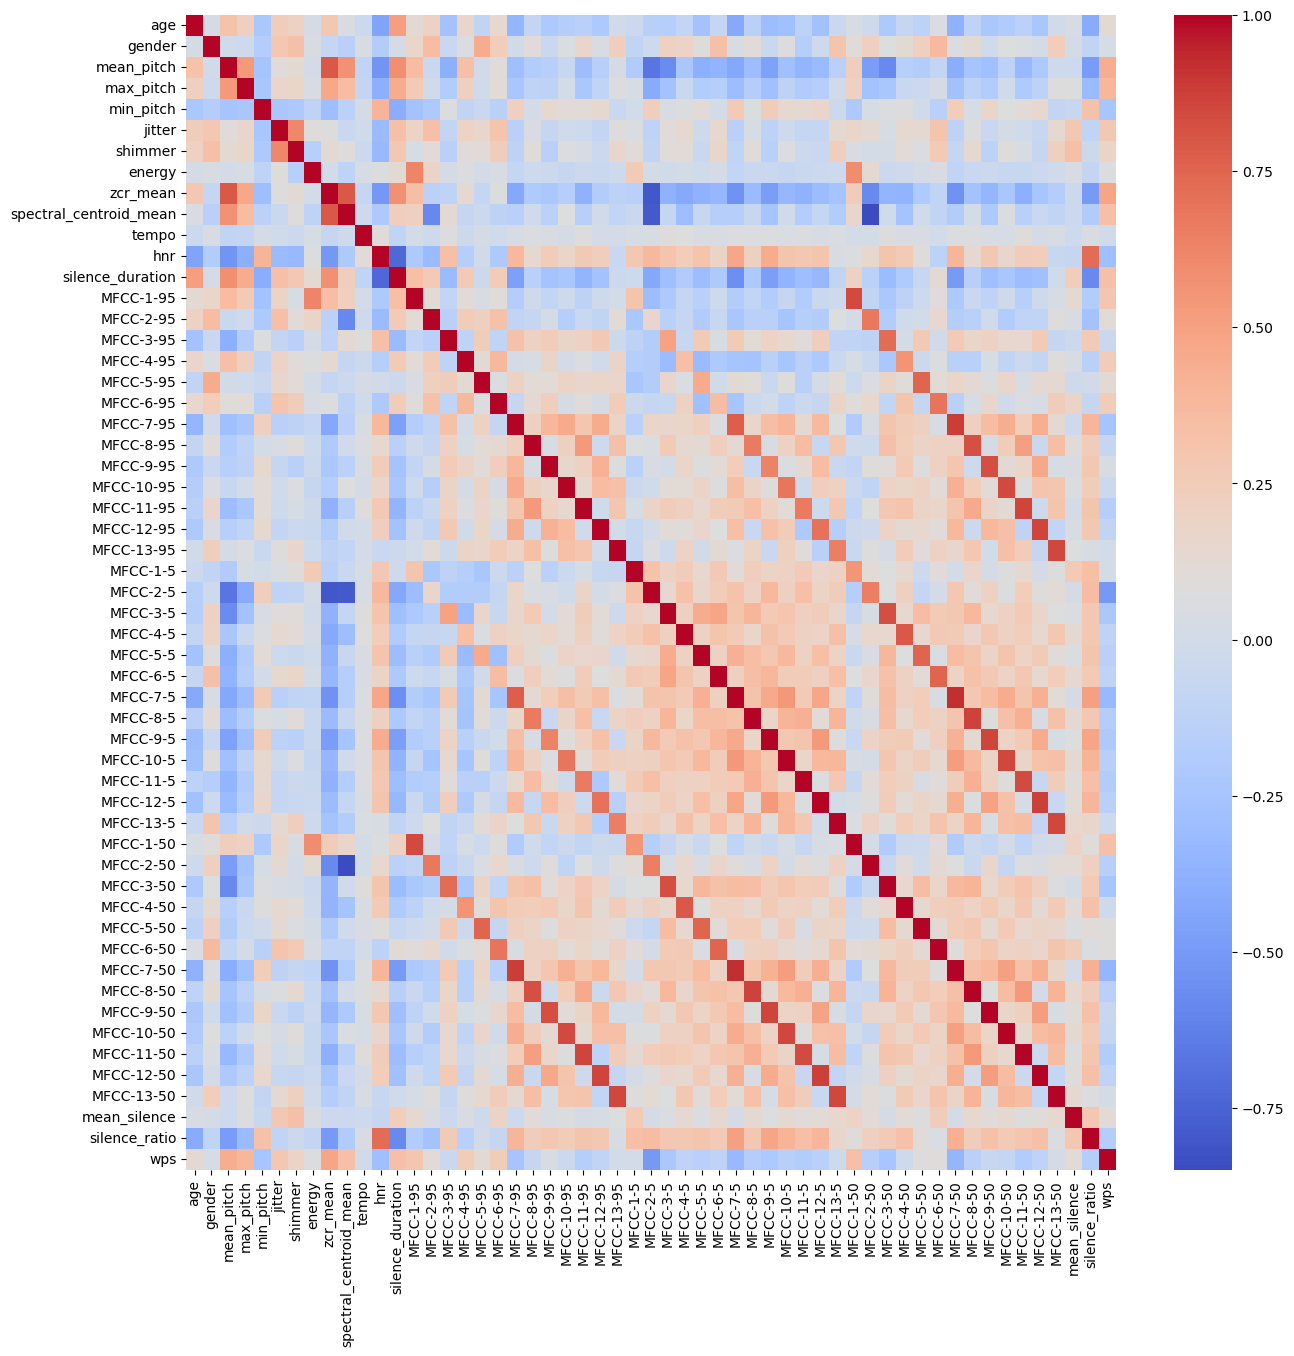

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df_dev.corr(), cmap="coolwarm")